In [5]:
from google.colab import files
uploaded = files.upload()  # this will prompt you to upload your CSV file

Saving archive (3).zip to archive (3).zip


In [8]:
import zipfile
import pandas as pd
import os

# Step 1: Extract ZIP
with zipfile.ZipFile('archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# Step 2: Check extracted files
print(os.listdir('extracted_files'))  # should show ['Online Retail.xlsx']

# Step 3: Load the Excel file
data = pd.read_excel('extracted_files/Online Retail.xlsx')
print(data.head())
print(data.info())

['Online Retail.xlsx']
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  -

In [9]:
import pandas as pd

# Load the Excel file
data = pd.read_excel('extracted_files/Online Retail.xlsx')

# Inspect the data
print(data.head())
print(data.info())
print(data.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

Initial Data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------    

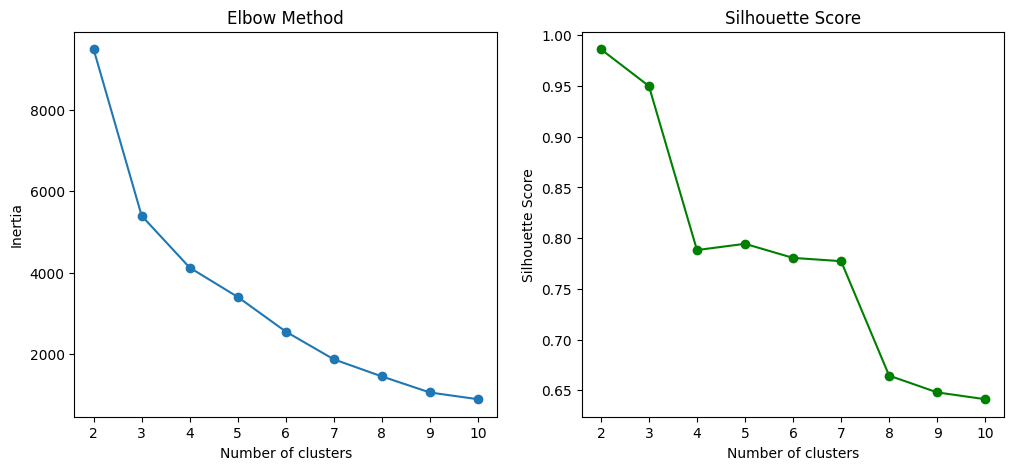

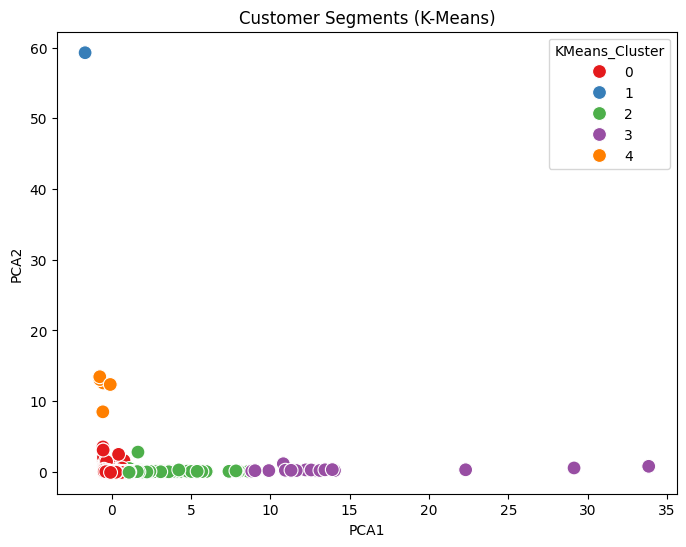


Cluster Profiling (Mean values):
                    Quantity  AvgUnitPrice  NumPurchases
KMeans_Cluster                                          
0                 643.372139      3.518143      3.008860
1                   1.000000   2033.100000      1.000000
2                5683.722222      3.547980     20.047619
3               62852.444444      4.475773     69.388889
4                 806.400000    414.556000      1.800000

Customer segmentation completed. Results saved to 'Customer_Segmentation_Results.csv'


In [10]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load Excel file
data = pd.read_excel('extracted_files/Online Retail.xlsx')
print("Initial Data:")
print(data.head())
print(data.info())

# Step 2: Data Cleaning
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])
# Remove canceled orders (Quantity <=0)
data = data[data['Quantity'] > 0]

# Step 3: Feature Engineering / Aggregation
# Aggregate data per customer
customer_data = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique'  # number of purchases
}).reset_index()

customer_data.rename(columns={'InvoiceNo':'NumPurchases', 'UnitPrice':'AvgUnitPrice'}, inplace=True)
print("\nAggregated Customer Data:")
print(customer_data.head())

# Step 4: Scaling Numerical Features
features = ['Quantity', 'AvgUnitPrice', 'NumPurchases']
X = customer_data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: K-Means Clustering
# Determine optimal k using Elbow Method and Silhouette Score
inertia = []
sil_scores = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# From the plots, choose optimal k
optimal_k = 5  # change based on the plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Alternative Clustering (Hierarchical & DBSCAN)
# Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
customer_data['HierCluster'] = hier.fit_predict(X_scaled)

# DBSCAN (epsilon and min_samples may need tuning)
db = DBSCAN(eps=1.5, min_samples=5)
customer_data['DBSCANCluster'] = db.fit_predict(X_scaled)

# Step 7: Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
customer_data['PCA1'] = X_pca[:,0]
customer_data['PCA2'] = X_pca[:,1]

# Visualization of K-Means Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=customer_data, palette='Set1', s=100)
plt.title('Customer Segments (K-Means)')
plt.show()

# Step 8: Cluster Profiling
cluster_profile = customer_data.groupby('KMeans_Cluster')[features].mean()
print("\nCluster Profiling (Mean values):")
print(cluster_profile)

# Step 9: Save Results
customer_data.to_csv('Customer_Segmentation_Results.csv', index=False)
print("\nCustomer segmentation completed. Results saved to 'Customer_Segmentation_Results.csv'")

In [11]:
# Example: print cluster insights
for cluster in cluster_profile.index:
    quantity = cluster_profile.loc[cluster, 'Quantity']
    avg_price = cluster_profile.loc[cluster, 'AvgUnitPrice']
    num_purchases = cluster_profile.loc[cluster, 'NumPurchases']

    print(f"\nCluster {cluster}:")
    print(f"  Average Quantity Bought: {quantity:.2f}")
    print(f"  Average Unit Price: {avg_price:.2f}")
    print(f"  Average Number of Purchases: {num_purchases:.2f}")

    # Simple business insights
    if quantity > cluster_profile['Quantity'].mean() and num_purchases > cluster_profile['NumPurchases'].mean():
        print("  → High-value and frequent buyers. Target with loyalty programs or premium offers.")
    elif quantity < cluster_profile['Quantity'].mean() and num_purchases < cluster_profile['NumPurchases'].mean():
        print("  → Low-value or at-risk customers. Consider retention campaigns.")
    else:
        print("  → Moderate customers. Could be targeted for upselling or promotions.")



Cluster 0:
  Average Quantity Bought: 643.37
  Average Unit Price: 3.52
  Average Number of Purchases: 3.01
  → Low-value or at-risk customers. Consider retention campaigns.

Cluster 1:
  Average Quantity Bought: 1.00
  Average Unit Price: 2033.10
  Average Number of Purchases: 1.00
  → Low-value or at-risk customers. Consider retention campaigns.

Cluster 2:
  Average Quantity Bought: 5683.72
  Average Unit Price: 3.55
  Average Number of Purchases: 20.05
  → Moderate customers. Could be targeted for upselling or promotions.

Cluster 3:
  Average Quantity Bought: 62852.44
  Average Unit Price: 4.48
  Average Number of Purchases: 69.39
  → High-value and frequent buyers. Target with loyalty programs or premium offers.

Cluster 4:
  Average Quantity Bought: 806.40
  Average Unit Price: 414.56
  Average Number of Purchases: 1.80
  → Low-value or at-risk customers. Consider retention campaigns.


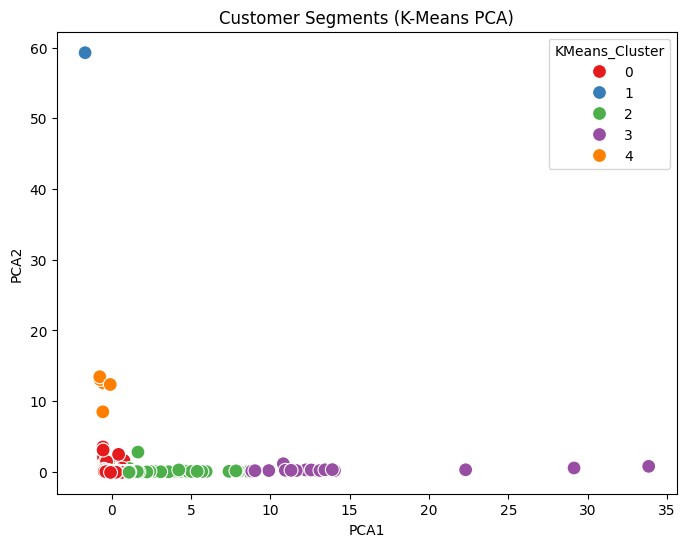

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=customer_data, palette='Set1', s=100)
plt.title('Customer Segments (K-Means PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

/tmp/ipython-input-1631816183.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KMeans_Cluster', data=customer_data, palette='Set2')


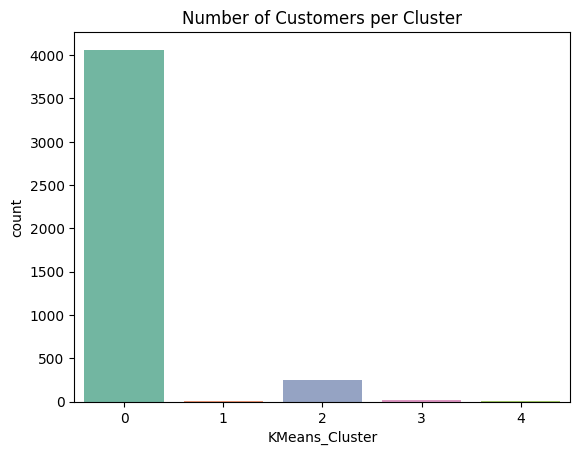

In [13]:
sns.countplot(x='KMeans_Cluster', data=customer_data, palette='Set2')
plt.title('Number of Customers per Cluster')
plt.show()

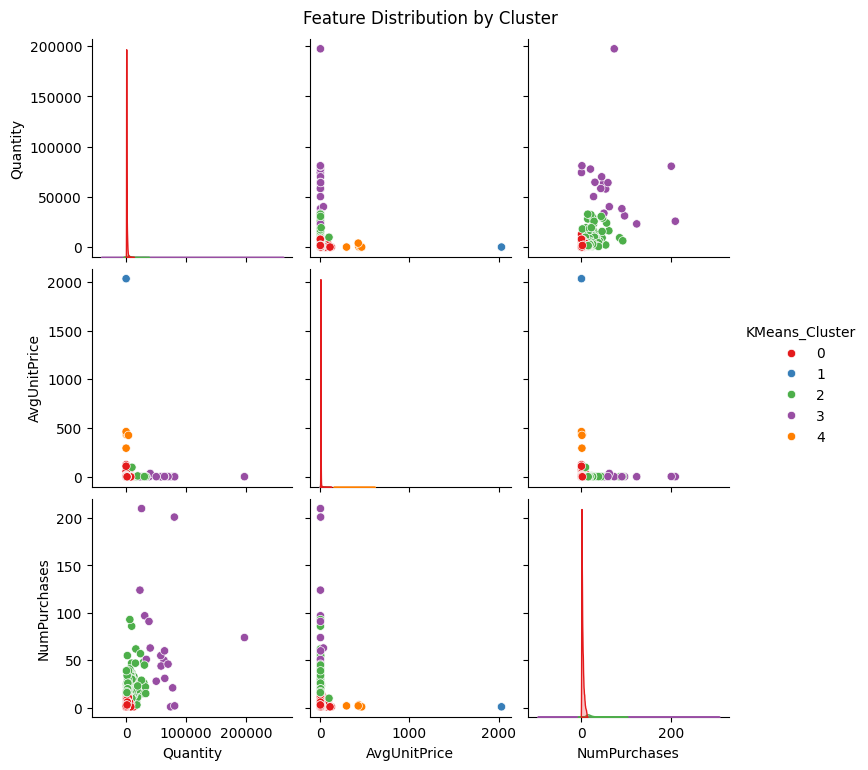

In [14]:
sns.pairplot(customer_data, vars=['Quantity','AvgUnitPrice','NumPurchases'], hue='KMeans_Cluster', palette='Set1')
plt.suptitle('Feature Distribution by Cluster', y=1.02)
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, customer_data['KMeans_Cluster'])
print("K-Means Silhouette Score:", score)

K-Means Silhouette Score: 0.7944236345850408


In [16]:
customer_data.to_csv('Customer_Segmentation_Results.csv', index=False)